# Import Commands

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
import scipy
from scipy.stats import pearsonr
import skopt
import sklearn

# Load data

In [29]:
data = pd.read_csv("Feature_table_protein.csv", sep='\t')
#to view the loaded data
data
#To get the number of rows and columns
data.shape

(57833, 43)

In [30]:
# Prepare Data
Y = data.iloc[:,-1]
X = data.iloc[:, 1:42]
#to view the spiltting 
X

,Length (aa),Has start codon,Amino acid percentage A,Amino acid percentage C,Amino acid percentage D,Amino acid percentage E,Amino acid percentage F,Amino acid percentage G,Amino acid percentage H,Amino acid percentage I,...,Molar extinction co-efficient reduced,Molar extinction co-efficient oxidized,Aliphatic_index,Charge,Polar,Acidic,Basic,Tiny,Non-polar,Aliphaticity
0,131,1,0.061069,0.053435,0.076336,0.068702,0.015267,0.061069,0.038168,0.030534,...,4470,4845,78.167939,0.274809,0.190840,0.145038,0.167939,0.229008,0.419847,0.259542
1,131,1,0.061069,0.053435,0.076336,0.068702,0.015267,0.061069,0.038168,0.030534,...,4470,4845,78.167939,0.274809,0.190840,0.145038,0.167939,0.229008,0.419847,0.259542
2,380,1,0.044737,0.021053,0.076316,0.057895,0.039474,0.052632,0.015789,0.050000,...,57870,58370,81.026316,0.239474,0.244737,0.134211,0.121053,0.226316,0.444737,0.257895
3,216,1,0.037037,0.013889,0.023148,0.083333,0.046296,0.106481,0.018519,0.074074,...,30940,31065,84.722222,0.254630,0.175926,0.106481,0.166667,0.212963,0.509259,0.268519
4,258,1,0.034884,0.038760,0.058140,0.073643,0.054264,0.034884,0.031008,0.054264,...,37360,37985,73.178295,0.310078,0.182171,0.131783,0.209302,0.174419,0.383721,0.236434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57828,880,1,0.047727,0.029545,0.039773,0.070455,0.051136,0.046591,0.018182,0.059091,...,95690,97315,89.920455,0.239773,0.222727,0.110227,0.147727,0.209091,0.454545,0.282955
57829,147,1,0.061224,0.013605,0.040816,0.088435,0.040816,0.027211,0.040816,0.081633,...,11460,11585,103.401361,0.238095,0.183673,0.129252,0.149660,0.170068,0.496599,0.333333
57830,587,1,0.045997,0.025554,0.054514,0.047700,0.032368,0.045997,0.040886,0.071550,...,81930,82805,86.660988,0.219761,0.260647,0.102215,0.158433,0.233390,0.441227,0.272572
57831,103,1,0.067961,0.029126,0.106796,0.087379,0.048544,0.048544,0.019417,0.077670,...,1490,1615,94.660194,0.330097,0.106796,0.194175,0.155340,0.174757,0.504854,0.310680


# XGBoost

In [31]:
#train and test data split up to 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [36]:
#build classifier
model = XGBClassifier()
model.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[12:17:06] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [37]:
#predictions and accuracy
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.42%


# pearson test for correlation

In [22]:
scipy.stats.pearsonr(data['Length (aa)'],data['Flexibility'])

(0.9999174611185162, 0.0)

In [23]:
scipy.stats.pearsonr(data['Aliphaticity'], data ['Aliphatic_index'])

(0.9305919302594283, 0.0)

In [24]:
scipy.stats.pearsonr(data['Isoelectric point'], data ['Basic'])

(0.5012016680905296, 0.0)

In [25]:
scipy.stats.pearsonr(data['Isoelectric point'], data ['Acidic'])

(-0.5823201847795593, 0.0)

In [26]:
scipy.stats.pearsonr(data['Gravy value'], data ['Non-polar'])

(0.8646981313662809, 0.0)

In [28]:
scipy.stats.pearsonr(data['Flexibility'], data ['Secondary structure fraction helix'])

(-0.01038077093658119, 0.012544963490878785)

In [29]:
scipy.stats.pearsonr(data['Tiny'], data ['Flexibility'])

(0.01499268074081814, 0.00031138644203453)

In [30]:
scipy.stats.pearsonr(data['Tiny'], data ['Amino acid percentage A'])

(0.482627212052707, 0.0)

In [88]:
scipy.stats.pearsonr(data['Length (aa)'],data['Secondary structure fraction helix'])

(-0.0025180335940152366, 0.5448222506994211)

In [89]:
scipy.stats.pearsonr(data['Length (aa)'],data['Gravy value'])

(-0.037405197845271014, 2.2915486946835083e-19)

# Initial model visualization

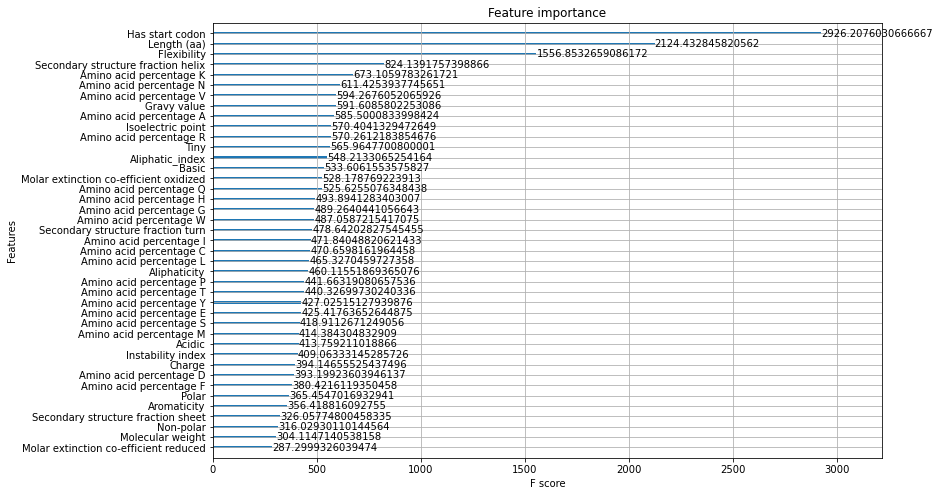

In [38]:
#plot the feature importance plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

plot_importance(model, importance_type = 'cover')
plt.show()

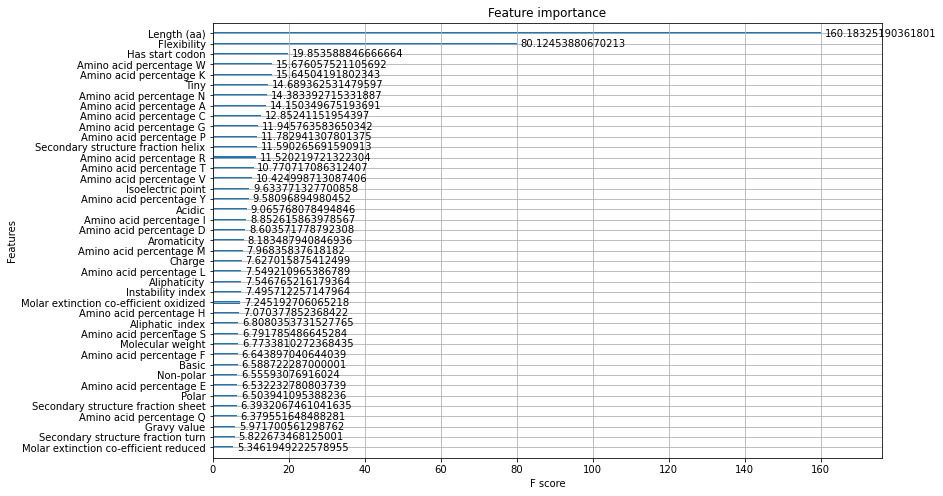

In [39]:
plot_importance(model, importance_type = 'gain')
plt.show()

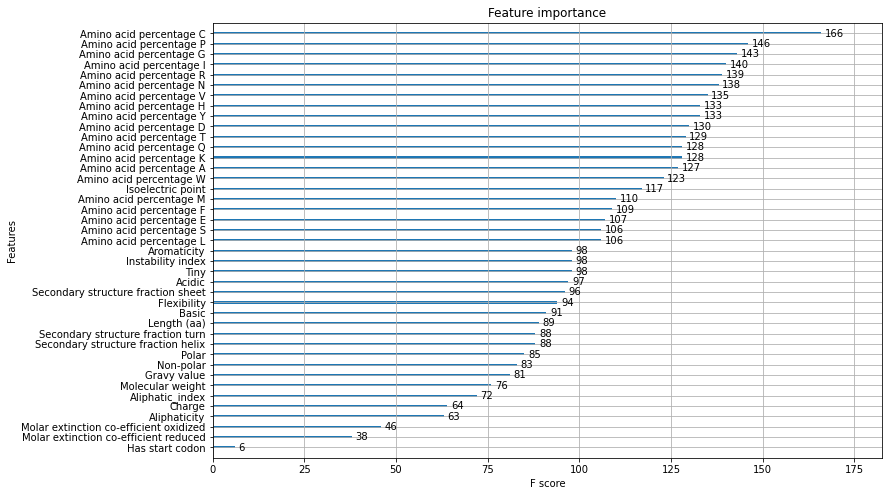

In [40]:
plot_importance(model, importance_type = 'weight')
plt.show()

In [41]:
#explanation plots for feaure importance
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)

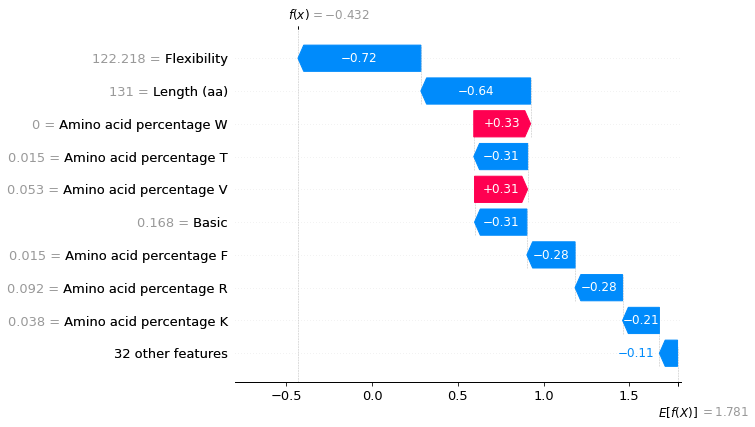

In [42]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

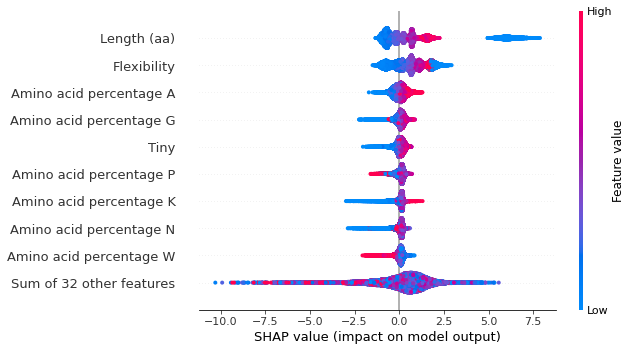

In [43]:
shap.plots.beeswarm(shap_values)

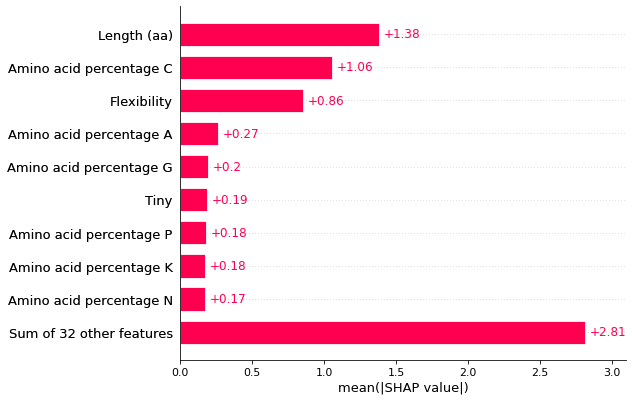

In [44]:
shap.plots.bar(shap_values)

In [21]:
X.iloc[0]

Length (aa)                                 131.000000
Has start codon                               1.000000
Amino acid percentage A                       0.061069
Amino acid percentage C                       0.053435
Amino acid percentage D                       0.076336
Amino acid percentage E                       0.068702
Amino acid percentage F                       0.015267
Amino acid percentage G                       0.061069
Amino acid percentage H                       0.038168
Amino acid percentage I                       0.030534
Amino acid percentage K                       0.038168
Amino acid percentage L                       0.114504
Amino acid percentage M                       0.053435
Amino acid percentage N                       0.076336
Amino acid percentage P                       0.030534
Amino acid percentage Q                       0.045802
Amino acid percentage R                       0.091603
Amino acid percentage S                       0.053435
Amino acid

# Optimization

In [32]:
## import statements
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import skopt
from skopt.searchcv import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [33]:
#load data
data = pd.read_csv("Feature_table_protein.csv",sep='\t')
Y = data.iloc[:,-1]
X = data.iloc[:, 1:42]

In [6]:
#Check the data
print(X.shape)

(57833, 41)


In [7]:
print(Y.shape)

(57833,)


In [8]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
57828    1
57829    1
57830    1
57831    1
57832    1
Name: Assigned, Length: 57833, dtype: int64

In [34]:
#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [35]:
#set the parameter space
space ={'learning_rate': Real(0.01, 1.0, 'log-uniform'),
        'min_child_weight': Integer(0, 10),
        'max_depth': Integer(0, 50),
        'max_delta_step': Integer(0, 20),
        'subsample': Real(0.01, 1.0, 'uniform'),
        'colsample_bytree': Real(0.01, 1.0, 'uniform'),
        'colsample_bylevel': Real(0.01, 1.0, 'uniform'),
        'reg_lambda': Real(1e-9, 1000, 'log-uniform'),
        'reg_alpha': Real(1e-9, 1.0, 'log-uniform'),
        'gamma': Real(1e-9, 0.5, 'log-uniform'),
        'min_child_weight': Integer(0, 5),
        'n_estimators': Integer(50, 200),
        'scale_pos_weight': Real(1e-6, 500, 'log-uniform')}

In [36]:
#callback function to be used later which stops parameter search if it goes above 98% to save time
def on_step(optim_result):
    """
    Callback meant to view scores after
    each iteration while performing Bayesian
    Optimization in Skopt"""
    score = xgb_bayes_search.best_score_
    print("best score: %s" % score)
    if score >= 0.98:
        print('Interrupting!')
        return True
    


In [52]:
#Search for best parameters (could take like an hour or so, depending on number of inputs)
xgbcl = xgb.XGBClassifier()

xgb_bayes_search = BayesSearchCV(xgbcl, space, n_iter=32, # specify how many iterations
                                    scoring=None, n_jobs=1, cv=5, verbose=3, random_state=42, n_points=12,
                                 refit=True)

xgb_bayes_search.fit(X_train, y_train.ravel(), callback = on_step)

#prints best parameters
xgb_bayes_search.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] colsample_bylevel=0.4160029192647807, colsample_bytree=0.7304484857455519, gamma=0.13031389926541354, learning_rate=0.042815319280763466, max_delta_step=13, max_depth=21, min_child_weight=2, n_estimators=161, reg_alpha=5.497557739289786e-07, reg_lambda=0.05936070635912049, scale_pos_weight=0.060830282487222144, subsample=0.13556548021189216 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[10:01:11] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.4160029192647807, colsample_bytree=0.7304484857455519, gamma=0.13031389926541354, learning_rate=0.042815319280763466, max_delta_step=13, max_depth=21, min_child_weight=2, n_estimators=161, reg_alpha=5.497557739289786e-07, reg_lambda=0.05936070635912049, scale_pos_weight=0.060830282487222144, subsample=0.13556548021189216, score=0.762, total=   4.6s
[CV] colsample_bylevel=0.4160029192647807, colsample_bytree=0.7304484857455519, gamma=0.13031389926541354, learning_rate=0.042815319280763466, max_delta_step=13, max_depth=21, min_child_weight=2, n_estimators=161, reg_alpha=5.497557739289786e-07, reg_lambda=0.05936070635912049, scale_pos_weight=0.060830282487222144, sub

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV]  colsample_bylevel=0.4160029192647807, colsample_bytree=0.7304484857455519, gamma=0.13031389926541354, learning_rate=0.042815319280763466, max_delta_step=13, max_depth=21, min_child_weight=2, n_estimators=161, reg_alpha=5.497557739289786e-07, reg_lambda=0.05936070635912049, scale_pos_weight=0.060830282487222144, subsample=0.13556548021189216, score=0.765, total=   3.2s
[CV] colsample_bylevel=0.4160029192647807, colsample_bytree=0.7304484857455519, gamma=0.13031389926541354, learning_rate=0.042815319280763466, max_delta_step=13, max_depth=21, min_child_weight=2, n_estimators=161, reg_alpha=5.497557739289786e-07, reg_lambda=0.05936070635912049, scale_pos_weight=0.060830282487222144, subsample=0.13556548021189216 
[10:01:19] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like t

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.8s remaining:    0.0s


[CV]  colsample_bylevel=0.4160029192647807, colsample_bytree=0.7304484857455519, gamma=0.13031389926541354, learning_rate=0.042815319280763466, max_delta_step=13, max_depth=21, min_child_weight=2, n_estimators=161, reg_alpha=5.497557739289786e-07, reg_lambda=0.05936070635912049, scale_pos_weight=0.060830282487222144, subsample=0.13556548021189216, score=0.759, total=   4.0s
[CV] colsample_bylevel=0.4160029192647807, colsample_bytree=0.7304484857455519, gamma=0.13031389926541354, learning_rate=0.042815319280763466, max_delta_step=13, max_depth=21, min_child_weight=2, n_estimators=161, reg_alpha=5.497557739289786e-07, reg_lambda=0.05936070635912049, scale_pos_weight=0.060830282487222144, subsample=0.13556548021189216 
[10:01:23] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like t

[CV]  colsample_bylevel=0.25617325301227906, colsample_bytree=0.7083937150495909, gamma=2.41812432168581e-07, learning_rate=0.13965555720269418, max_delta_step=10, max_depth=27, min_child_weight=1, n_estimators=76, reg_alpha=3.178148842971562e-08, reg_lambda=0.005381781269387993, scale_pos_weight=0.23835043249575294, subsample=0.9559763235078597, score=0.899, total=   3.9s
[CV] colsample_bylevel=0.25617325301227906, colsample_bytree=0.7083937150495909, gamma=2.41812432168581e-07, learning_rate=0.13965555720269418, max_delta_step=10, max_depth=27, min_child_weight=1, n_estimators=76, reg_alpha=3.178148842971562e-08, reg_lambda=0.005381781269387993, scale_pos_weight=0.23835043249575294, subsample=0.9559763235078597 
[10:02:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to 

[CV]  colsample_bylevel=0.7711308526006485, colsample_bytree=0.07988300914246868, gamma=1.3877597085692663e-08, learning_rate=0.15021004353467043, max_delta_step=6, max_depth=3, min_child_weight=3, n_estimators=77, reg_alpha=0.006097622112520179, reg_lambda=1.9368851099909265e-09, scale_pos_weight=6.97020795804701e-06, subsample=0.46717487628832827, score=0.188, total=   0.3s
[CV] colsample_bylevel=0.7711308526006485, colsample_bytree=0.07988300914246868, gamma=1.3877597085692663e-08, learning_rate=0.15021004353467043, max_delta_step=6, max_depth=3, min_child_weight=3, n_estimators=77, reg_alpha=0.006097622112520179, reg_lambda=1.9368851099909265e-09, scale_pos_weight=6.97020795804701e-06, subsample=0.46717487628832827 
[10:02:48] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd li

[CV]  colsample_bylevel=0.3569079180734289, colsample_bytree=0.1120289995668169, gamma=0.05034432042804318, learning_rate=0.7467518194835729, max_delta_step=7, max_depth=47, min_child_weight=1, n_estimators=67, reg_alpha=0.005500281359785164, reg_lambda=6.3166999939833564e-06, scale_pos_weight=0.4420166988445819, subsample=0.037978567417966985, score=0.749, total=   0.4s
[CV] colsample_bylevel=0.3569079180734289, colsample_bytree=0.1120289995668169, gamma=0.05034432042804318, learning_rate=0.7467518194835729, max_delta_step=7, max_depth=47, min_child_weight=1, n_estimators=67, reg_alpha=0.005500281359785164, reg_lambda=6.3166999939833564e-06, scale_pos_weight=0.4420166988445819, subsample=0.037978567417966985 
[10:03:01] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to rest

[CV]  colsample_bylevel=0.19358622710388942, colsample_bytree=0.9236239290551462, gamma=6.242737149649543e-09, learning_rate=0.5839290998374393, max_delta_step=9, max_depth=2, min_child_weight=1, n_estimators=157, reg_alpha=0.32247446903004606, reg_lambda=5.7439751766594195e-06, scale_pos_weight=1.6287615199535114e-06, subsample=0.9872483677632868, score=0.187, total=   0.5s
[CV] colsample_bylevel=0.19358622710388942, colsample_bytree=0.9236239290551462, gamma=6.242737149649543e-09, learning_rate=0.5839290998374393, max_delta_step=9, max_depth=2, min_child_weight=1, n_estimators=157, reg_alpha=0.32247446903004606, reg_lambda=5.7439751766594195e-06, scale_pos_weight=1.6287615199535114e-06, subsample=0.9872483677632868 
[10:03:12] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like

[CV]  colsample_bylevel=0.06936552953088004, colsample_bytree=0.5708703891954323, gamma=1.9956389638103137e-08, learning_rate=0.09010297955022104, max_delta_step=9, max_depth=25, min_child_weight=2, n_estimators=139, reg_alpha=0.9824119669778386, reg_lambda=0.00017577858139476563, scale_pos_weight=261.4450653749918, subsample=0.14242164035537377, score=0.831, total=   2.2s
[CV] colsample_bylevel=0.06936552953088004, colsample_bytree=0.5708703891954323, gamma=1.9956389638103137e-08, learning_rate=0.09010297955022104, max_delta_step=9, max_depth=25, min_child_weight=2, n_estimators=139, reg_alpha=0.9824119669778386, reg_lambda=0.00017577858139476563, scale_pos_weight=261.4450653749918, subsample=0.14242164035537377 
[10:03:23] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to 

[CV]  colsample_bylevel=0.8477171831834894, colsample_bytree=0.9590782028716157, gamma=0.4419705200245942, learning_rate=0.010068534554171981, max_delta_step=18, max_depth=46, min_child_weight=5, n_estimators=66, reg_alpha=1.3396471230171212e-09, reg_lambda=0.1502689667792386, scale_pos_weight=5.68219069233494e-06, subsample=0.3682037565911086, score=0.188, total=   0.5s
[CV] colsample_bylevel=0.8477171831834894, colsample_bytree=0.9590782028716157, gamma=0.4419705200245942, learning_rate=0.010068534554171981, max_delta_step=18, max_depth=46, min_child_weight=5, n_estimators=66, reg_alpha=1.3396471230171212e-09, reg_lambda=0.1502689667792386, scale_pos_weight=5.68219069233494e-06, subsample=0.3682037565911086 
[10:03:35] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to rest

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.6min finished


best score: 0.8959711235032205
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] colsample_bylevel=0.6365557818946788, colsample_bytree=0.9825446250781295, gamma=0.49999999999999994, learning_rate=0.01, max_delta_step=20, max_depth=23, min_child_weight=0, n_estimators=200, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=0.8112445975870746, subsample=0.01 
[10:03:56] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV]  colsample_bylevel=0.6365557818946788, colsample_bytree=0.9825446250781295, gamma=0.49999999999999994, learning_rate=0.01, max_delta_step=20, max_depth=23, min_child_weight=0, n_estimators=200, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=0.8112445975870746, subsample=0.01, score=0.872, total=   8.4s
[CV] colsample_bylevel=0.6365557818946788, colsample_bytree=0.9825446250781295, gamma=0.49999999999999994, learning_rate=0.01, max_delta_step=20, max_depth=23, min_child_weight=0, n_estimators=200, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=0.8112445975870746, subsample=0.01 
[10:04:05] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


[CV]  colsample_bylevel=0.6365557818946788, colsample_bytree=0.9825446250781295, gamma=0.49999999999999994, learning_rate=0.01, max_delta_step=20, max_depth=23, min_child_weight=0, n_estimators=200, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=0.8112445975870746, subsample=0.01, score=0.868, total=   8.6s
[CV] colsample_bylevel=0.6365557818946788, colsample_bytree=0.9825446250781295, gamma=0.49999999999999994, learning_rate=0.01, max_delta_step=20, max_depth=23, min_child_weight=0, n_estimators=200, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=0.8112445975870746, subsample=0.01 
[10:04:13] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.0s remaining:    0.0s


[CV]  colsample_bylevel=0.6365557818946788, colsample_bytree=0.9825446250781295, gamma=0.49999999999999994, learning_rate=0.01, max_delta_step=20, max_depth=23, min_child_weight=0, n_estimators=200, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=0.8112445975870746, subsample=0.01, score=0.869, total=   9.0s
[CV] colsample_bylevel=0.6365557818946788, colsample_bytree=0.9825446250781295, gamma=0.49999999999999994, learning_rate=0.01, max_delta_step=20, max_depth=23, min_child_weight=0, n_estimators=200, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=0.8112445975870746, subsample=0.01 
[10:04:22] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.6365557818946788, colsample_bytree=0.9825446250781295, gamma=0.499999999

[CV]  colsample_bylevel=0.2540050350499221, colsample_bytree=0.9266006223125062, gamma=1e-09, learning_rate=0.011078014971426142, max_delta_step=20, max_depth=50, min_child_weight=1, n_estimators=187, reg_alpha=1.550519109366797e-08, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.018881945379252054, score=0.816, total=   5.2s
[CV] colsample_bylevel=0.2540050350499221, colsample_bytree=0.9266006223125062, gamma=1e-09, learning_rate=0.011078014971426142, max_delta_step=20, max_depth=50, min_child_weight=1, n_estimators=187, reg_alpha=1.550519109366797e-08, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.018881945379252054 
[10:05:35] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.2540

[CV]  colsample_bylevel=0.33407666430337407, colsample_bytree=1.0, gamma=0.013138859133240859, learning_rate=0.03220505573925246, max_delta_step=17, max_depth=43, min_child_weight=0, n_estimators=159, reg_alpha=1e-09, reg_lambda=1.812663468192265e-08, scale_pos_weight=0.3199898535413104, subsample=0.04034822847127343, score=0.874, total=   7.4s
[CV] colsample_bylevel=0.33407666430337407, colsample_bytree=1.0, gamma=0.013138859133240859, learning_rate=0.03220505573925246, max_delta_step=17, max_depth=43, min_child_weight=0, n_estimators=159, reg_alpha=1e-09, reg_lambda=1.812663468192265e-08, scale_pos_weight=0.3199898535413104, subsample=0.04034822847127343 
[10:06:32] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.334076

[CV]  colsample_bylevel=0.47189471157931534, colsample_bytree=0.012892520766257812, gamma=1e-09, learning_rate=0.014651949124294648, max_delta_step=16, max_depth=0, min_child_weight=0, n_estimators=200, reg_alpha=2.6309023577251155e-08, reg_lambda=1e-09, scale_pos_weight=0.5989523976503053, subsample=0.01, score=0.812, total=   0.5s
[CV] colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.9340102511820643, max_delta_step=20, max_depth=4, min_child_weight=0, n_estimators=54, reg_alpha=1.0550412589518063e-06, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=1.0 
[10:07:09] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.93401025118

[CV]  colsample_bylevel=0.04103815399593617, colsample_bytree=0.6783716758667875, gamma=1e-09, learning_rate=1.0, max_delta_step=20, max_depth=19, min_child_weight=1, n_estimators=95, reg_alpha=1e-09, reg_lambda=1.0331464154433432, scale_pos_weight=163.8604863843013, subsample=1.0, score=0.868, total=   2.0s
[CV] colsample_bylevel=0.7655198641664515, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.01, max_delta_step=20, max_depth=0, min_child_weight=3, n_estimators=200, reg_alpha=3.1387734174660104e-07, reg_lambda=1e-09, scale_pos_weight=116.02009142061088, subsample=1.0 
[10:07:23] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.7655198641664515, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.01, max_delta_step=20

[CV]  colsample_bylevel=0.01, colsample_bytree=0.07256455709458025, gamma=1e-09, learning_rate=1.0, max_delta_step=20, max_depth=0, min_child_weight=4, n_estimators=50, reg_alpha=0.00031588363774261077, reg_lambda=1.569320336240206e-08, scale_pos_weight=58.42081998677289, subsample=1.0, score=0.813, total=   0.1s
[CV] colsample_bylevel=0.01, colsample_bytree=0.07256455709458025, gamma=1e-09, learning_rate=1.0, max_delta_step=20, max_depth=0, min_child_weight=4, n_estimators=50, reg_alpha=0.00031588363774261077, reg_lambda=1.569320336240206e-08, scale_pos_weight=58.42081998677289, subsample=1.0 
[10:07:25] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.01, colsample_bytree=0.07256455709458025, gamma=1e-09, learning_rate=1

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.5min finished


best score: 0.8959711235032205
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] colsample_bylevel=0.36348422755194587, colsample_bytree=0.49217590359320057, gamma=0.44818908608675617, learning_rate=0.5681801220307742, max_delta_step=7, max_depth=43, min_child_weight=1, n_estimators=180, reg_alpha=1.0080859711634684e-09, reg_lambda=0.6331781314454205, scale_pos_weight=0.636933570604149, subsample=0.4436252790245246 
[10:07:33] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV]  colsample_bylevel=0.36348422755194587, colsample_bytree=0.49217590359320057, gamma=0.44818908608675617, learning_rate=0.5681801220307742, max_delta_step=7, max_depth=43, min_child_weight=1, n_estimators=180, reg_alpha=1.0080859711634684e-09, reg_lambda=0.6331781314454205, scale_pos_weight=0.636933570604149, subsample=0.4436252790245246, score=0.881, total=   4.7s
[CV] colsample_bylevel=0.36348422755194587, colsample_bytree=0.49217590359320057, gamma=0.44818908608675617, learning_rate=0.5681801220307742, max_delta_step=7, max_depth=43, min_child_weight=1, n_estimators=180, reg_alpha=1.0080859711634684e-09, reg_lambda=0.6331781314454205, scale_pos_weight=0.636933570604149, subsample=0.4436252790245246 
[10:07:38] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  colsample_bylevel=0.36348422755194587, colsample_bytree=0.49217590359320057, gamma=0.44818908608675617, learning_rate=0.5681801220307742, max_delta_step=7, max_depth=43, min_child_weight=1, n_estimators=180, reg_alpha=1.0080859711634684e-09, reg_lambda=0.6331781314454205, scale_pos_weight=0.636933570604149, subsample=0.4436252790245246, score=0.879, total=   4.5s
[CV] colsample_bylevel=0.36348422755194587, colsample_bytree=0.49217590359320057, gamma=0.44818908608675617, learning_rate=0.5681801220307742, max_delta_step=7, max_depth=43, min_child_weight=1, n_estimators=180, reg_alpha=1.0080859711634684e-09, reg_lambda=0.6331781314454205, scale_pos_weight=0.636933570604149, subsample=0.4436252790245246 
[10:07:42] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.2s remaining:    0.0s


[CV]  colsample_bylevel=0.36348422755194587, colsample_bytree=0.49217590359320057, gamma=0.44818908608675617, learning_rate=0.5681801220307742, max_delta_step=7, max_depth=43, min_child_weight=1, n_estimators=180, reg_alpha=1.0080859711634684e-09, reg_lambda=0.6331781314454205, scale_pos_weight=0.636933570604149, subsample=0.4436252790245246, score=0.879, total=   4.4s
[CV] colsample_bylevel=0.36348422755194587, colsample_bytree=0.49217590359320057, gamma=0.44818908608675617, learning_rate=0.5681801220307742, max_delta_step=7, max_depth=43, min_child_weight=1, n_estimators=180, reg_alpha=1.0080859711634684e-09, reg_lambda=0.6331781314454205, scale_pos_weight=0.636933570604149, subsample=0.4436252790245246 
[10:07:47] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore 

[CV]  colsample_bylevel=0.01, colsample_bytree=0.555016369164017, gamma=2.425683721769788e-09, learning_rate=1.0, max_delta_step=20, max_depth=0, min_child_weight=4, n_estimators=200, reg_alpha=1e-09, reg_lambda=3.279204026789956e-09, scale_pos_weight=3.1870809509350493, subsample=0.3559076747084511, score=0.812, total=   0.5s
[CV] colsample_bylevel=0.01, colsample_bytree=0.555016369164017, gamma=2.425683721769788e-09, learning_rate=1.0, max_delta_step=20, max_depth=0, min_child_weight=4, n_estimators=200, reg_alpha=1e-09, reg_lambda=3.279204026789956e-09, scale_pos_weight=3.1870809509350493, subsample=0.3559076747084511 
[10:08:23] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.01, colsample_bytree=0.555016369164017, ga

[CV]  colsample_bylevel=0.01, colsample_bytree=1.0, gamma=5.3834431110184527e-08, learning_rate=1.0, max_delta_step=15, max_depth=50, min_child_weight=0, n_estimators=164, reg_alpha=2.766228220676625e-09, reg_lambda=0.008155232079302906, scale_pos_weight=23.91297152003246, subsample=0.5232734025353389, score=0.830, total=   4.2s
[CV] colsample_bylevel=0.01, colsample_bytree=1.0, gamma=5.3834431110184527e-08, learning_rate=1.0, max_delta_step=15, max_depth=50, min_child_weight=0, n_estimators=164, reg_alpha=2.766228220676625e-09, reg_lambda=0.008155232079302906, scale_pos_weight=23.91297152003246, subsample=0.5232734025353389 
[10:08:36] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.01, colsample_bytree=1.0, gamma=5.3834

[CV]  colsample_bylevel=0.35091037037287587, colsample_bytree=1.0, gamma=0.00016252256335709216, learning_rate=1.0, max_delta_step=1, max_depth=19, min_child_weight=5, n_estimators=62, reg_alpha=1e-09, reg_lambda=0.811943190296748, scale_pos_weight=0.5113002948440577, subsample=1.0, score=0.883, total=   3.0s
[CV] colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1.5016677623174462e-07, learning_rate=1.0, max_delta_step=13, max_depth=50, min_child_weight=0, n_estimators=55, reg_alpha=1e-09, reg_lambda=461.8429707047547, scale_pos_weight=0.5902245644694897, subsample=1.0 
[10:09:08] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1.5016677623174462e-07, learning_rate=1.0, max_delta_step=13

[CV]  colsample_bylevel=0.07703658253710086, colsample_bytree=0.9087044430867337, gamma=1.0157158216903716e-07, learning_rate=1.0, max_delta_step=10, max_depth=30, min_child_weight=1, n_estimators=50, reg_alpha=1.987713797918881e-09, reg_lambda=51.22775979086076, scale_pos_weight=0.5915023504056683, subsample=1.0, score=0.892, total=   1.4s


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.8min finished


best score: 0.8959711235032205
[10:09:22] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


OrderedDict([('colsample_bylevel', 0.25617325301227906),
             ('colsample_bytree', 0.7083937150495909),
             ('gamma', 2.41812432168581e-07),
             ('learning_rate', 0.13965555720269418),
             ('max_delta_step', 10),
             ('max_depth', 27),
             ('min_child_weight', 1),
             ('n_estimators', 76),
             ('reg_alpha', 3.178148842971562e-08),
             ('reg_lambda', 0.005381781269387993),
             ('scale_pos_weight', 0.23835043249575294),
             ('subsample', 0.9559763235078597)])

In [16]:
print(X_train)

       Length (aa)  Has start codon  Amino acid percentage A  \
33272           77                1                 0.116883   
18748          194                1                 0.056701   
13174          668                1                 0.073353   
1647           100                1                 0.000000   
36411          401                1                 0.099751   
...            ...              ...                      ...   
57825          344                1                 0.046512   
57601          233                1                 0.051502   
4839           211                1                 0.042654   
12850          127                1                 0.110236   
45184          588                1                 0.023810   

       Amino acid percentage C  Amino acid percentage D  \
33272                 0.025974                 0.000000   
18748                 0.015464                 0.030928   
13174                 0.022455                 0.05838

In [53]:
#initialise new model with the best parameters, can fit model to data now with this model :)
model = xgb.XGBClassifier(**xgb_bayes_search.best_params_)

In [37]:
#if not in the same session then run this instead of searching for best parameters 
from collections import OrderedDict 
params = OrderedDict([('colsample_bylevel', 0.25617325301227906),
             ('colsample_bytree', 0.7083937150495909),
             ('gamma', 2.41812432168581e-07),
             ('learning_rate', 0.13965555720269418),
             ('max_delta_step', 10),
             ('max_depth', 27),
             ('min_child_weight', 1),
             ('n_estimators', 76),
             ('reg_alpha', 3.178148842971562e-08),
             ('reg_lambda', 0.005381781269387993),
             ('scale_pos_weight', 0.23835043249575294),
             ('subsample', 0.9559763235078597)])
model = xgb.XGBClassifier(**params)

In [39]:
#for different session (not required) 
XGBClassifier params = {base_score=0.5, booster='gbtree',
              colsample_bylevel=0.25617325301227906, colsample_bynode=1,
              colsample_bytree=0.7083937150495909, gamma=2.41812432168581e-07,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.13965555720269418, max_delta_step=10,
              max_depth=27, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=76, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=3.178148842971562e-08, reg_lambda=0.005381781269387993,
              scale_pos_weight=0.23835043249575294,
              subsample=0.9559763235078597, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None}
 model = xgb.XGBClassifier(**params)           

SyntaxError: invalid syntax (754780789.py, line 2)

In [54]:
#cross validation works as a way of evaluating performance of the model across different data splits
#eg. Training the model on samples 1-80 and testing on samples 81-100 might give 90% accuracy
# but training the model on samples 21-100 and testing on samples 1-20 might give 80% accuracy
# in this scenario it could leave up to 10% of accuracy up to chance


results = []

#can change n_splits
cv = StratifiedKFold(n_splits=10,shuffle=False)

#use all your data here, it does the train_test_split for you!
for train,test in cv.split(X,Y):
    model.fit(X.iloc[train],Y.iloc[train].ravel())
    y_pred = model.predict(X.iloc[test])
    predictions = [round(value) for value in y_pred]
    #sees how accurate the model was when testing the test set
    accuracy = accuracy_score(Y.iloc[test], predictions)
    pcent = accuracy * 100.0
    print(pcent)
    results.append(pcent)

print("Training Testing Accuracy: %.2f%% (%.2f%%)" % (np.mean(results), np.std(results)))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[10:10:09] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
89.74757952973721
[10:10:15] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
88.31258644536652
[10:10:20] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
88.29529737206086
[10:10:26] WARNING: /tmp/build/80754af9/

In [30]:
X.iloc[train]

,Length (aa),Has start codon,Amino acid percentage A,Amino acid percentage C,Amino acid percentage D,Amino acid percentage E,Amino acid percentage F,Amino acid percentage G,Amino acid percentage H,Amino acid percentage I,...,Molar extinction co-efficient reduced,Molar extinction co-efficient oxidized,Aliphatic_index,Charge,Polar,Acidic,Basic,Tiny,Non-polar,Aliphaticity
2159,112,1,0.044643,0.017857,0.080357,0.053571,0.026786,0.026786,0.008929,0.035714,...,8940,9065,90.446429,0.258929,0.205357,0.133929,0.133929,0.151786,0.455357,0.285714
2160,113,1,0.079646,0.000000,0.070796,0.061947,0.026549,0.008850,0.000000,0.061947,...,12950,12950,97.433628,0.265487,0.212389,0.132743,0.132743,0.159292,0.477876,0.336283
2161,215,1,0.083721,0.051163,0.023256,0.055814,0.037209,0.083721,0.009302,0.046512,...,62450,63075,108.325581,0.134884,0.181395,0.079070,0.065116,0.316279,0.600000,0.367442
2162,155,1,0.045161,0.000000,0.070968,0.096774,0.012903,0.006452,0.032258,0.064516,...,11460,11460,91.677419,0.270968,0.270968,0.167742,0.135484,0.141935,0.400000,0.296774
2163,124,1,0.056452,0.008065,0.056452,0.120968,0.024194,0.048387,0.032258,0.024194,...,9970,9970,90.967742,0.338710,0.153226,0.177419,0.193548,0.177419,0.443548,0.314516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57828,880,1,0.047727,0.029545,0.039773,0.070455,0.051136,0.046591,0.018182,0.059091,...,95690,97315,89.920455,0.239773,0.222727,0.110227,0.147727,0.209091,0.454545,0.282955
57829,147,1,0.061224,0.013605,0.040816,0.088435,0.040816,0.027211,0.040816,0.081633,...,11460,11585,103.401361,0.238095,0.183673,0.129252,0.149660,0.170068,0.496599,0.333333
57830,587,1,0.045997,0.025554,0.054514,0.047700,0.032368,0.045997,0.040886,0.071550,...,81930,82805,86.660988,0.219761,0.260647,0.102215,0.158433,0.233390,0.441227,0.272572
57831,103,1,0.067961,0.029126,0.106796,0.087379,0.048544,0.048544,0.019417,0.077670,...,1490,1615,94.660194,0.330097,0.106796,0.194175,0.155340,0.174757,0.504854,0.310680


In [18]:
print (X)

       Length (aa)  Has start codon  Amino acid percentage A  \
0              131                1                 0.061069   
1              131                1                 0.061069   
2              380                1                 0.044737   
3              216                1                 0.037037   
4              258                1                 0.034884   
...            ...              ...                      ...   
57828          880                1                 0.047727   
57829          147                1                 0.061224   
57830          587                1                 0.045997   
57831          103                1                 0.067961   
57832          510                1                 0.047059   

       Amino acid percentage C  Amino acid percentage D  \
0                     0.053435                 0.076336   
1                     0.053435                 0.076336   
2                     0.021053                 0.07631

# Best Model Explanation

In [11]:
xgb_best = xgb.XGBClassifier(**xgb_bayes_search.best_params_)
xgb_best.fit(X_train, y_train.ravel())

NameError: name 'xgb_bayes_search' is not defined

In [40]:
#if not in the same session
xgb_best = xgb.XGBClassifier(**params)

In [41]:
#if not in the same session
xgb_best.fit(X_train, y_train.ravel())

/home/shriprabha/anaconda3/envs/ML_env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:55:06] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=0.25617325301227906, colsample_bynode=1,
              colsample_bytree=0.7083937150495909, gamma=2.41812432168581e-07,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.13965555720269418, max_delta_step=10,
              max_depth=27, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=76, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=3.178148842971562e-08, reg_lambda=0.005381781269387993,
              scale_pos_weight=0.23835043249575294,
              subsample=0.9559763235078597, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

In [42]:
y_preds = xgb_best.predict(X_test)
predictions = [round(value) for value in y_preds]


# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.99%


# Evaluation metrics

In [68]:
from sklearn.metrics import f1_score, average_precision_score

f1 = f1_score(y_test, y_preds)
print(f1)

precision = average_precision_score(y_test, y_preds)
print(precision)


0.9382480669420612
0.9314036956372673


In [16]:
all_preds = xgb_best.predict(X)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, all_preds)

array([[10206,   587],
       [  589, 46451]])

In [18]:
import matplotlib.pyplot as plt

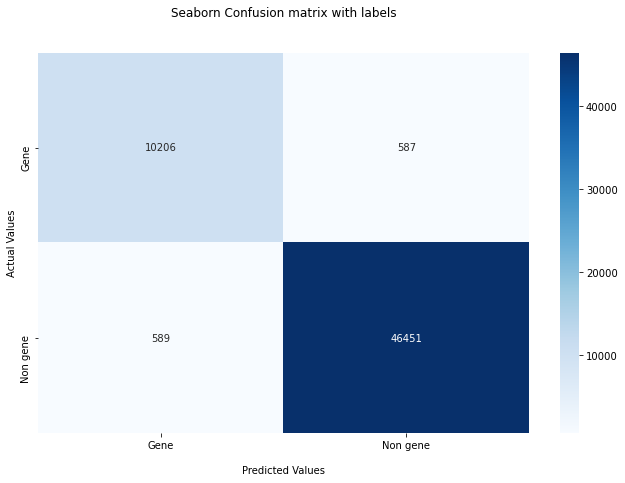

In [43]:
import seaborn as sns
cm = confusion_matrix(Y, all_preds)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_title('Seaborn Confusion matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Gene','Non gene'])
ax.yaxis.set_ticklabels(['Gene','Non gene'])

plt.rcParams['figure.figsize'] = (11,7)
plt.savefig('cm_aa.png', dpi=300)

In [75]:
from sklearn.metrics import matthews_corrcoef
print('MCC: %s'%(matthews_corrcoef(Y, all_preds)))

MCC: 0.933464607079249


In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = xgb_best.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)


AUC: 0.945


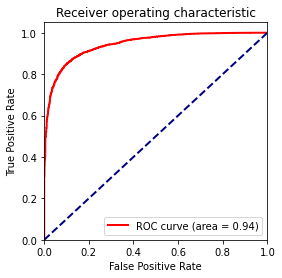

In [82]:
pea_fpr, pea_tpr, pea_thresholds = roc_curve(y_test, probs, 
                                 drop_intermediate = False)

plt.rcParams['figure.figsize'] = (4, 4)

plt.figure()
lw = 2
plt.plot(pea_fpr, pea_tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [56]:
import shap
explainer = shap.Explainer(xgb_best)
shap_values = explainer(X_train)

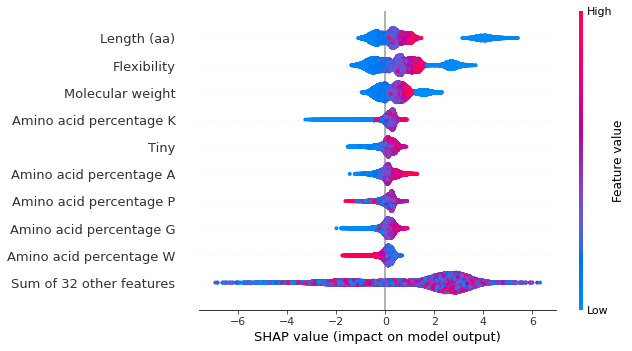

In [59]:
shap.plots.beeswarm(shap_values)

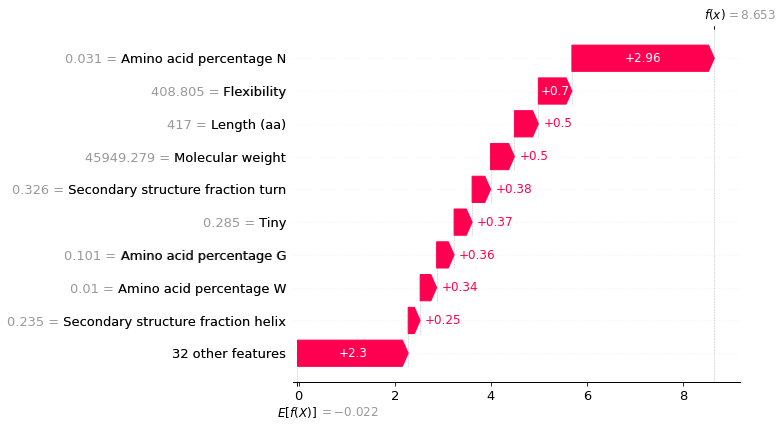

In [60]:
shap.plots.waterfall(shap_values[1])

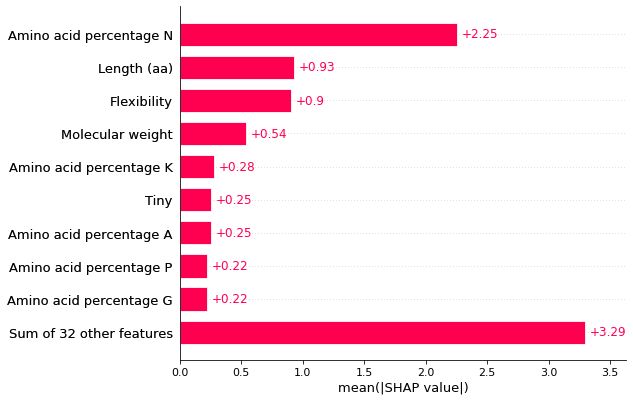

In [61]:
shap.plots.bar(shap_values)

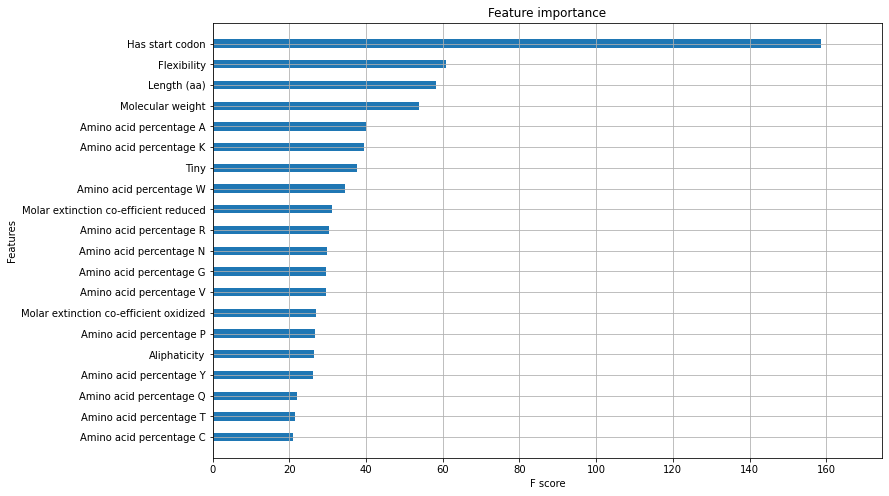

In [63]:
#plot the feature importance plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

plot_importance(xgb_best, importance_type = 'cover', show_values = False, height=0.4, max_num_features = 20)
plt.show()

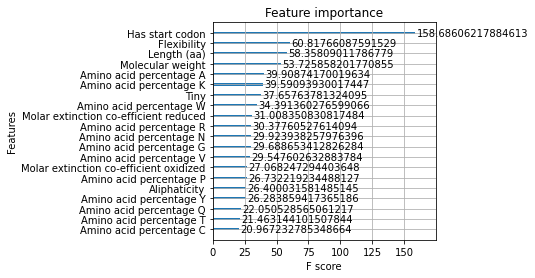

In [85]:
plot_importance(xgb_best, importance_type = 'cover', max_num_features = 20)
plt.show()

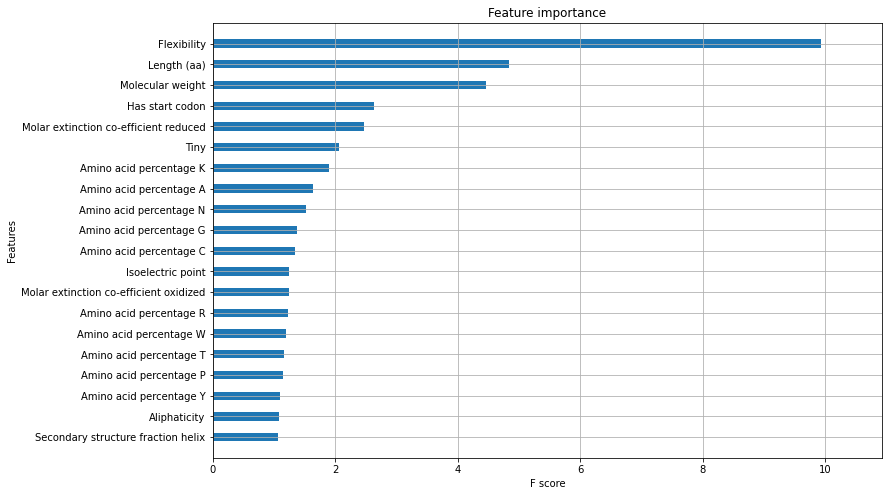

In [64]:
plot_importance(xgb_best, importance_type = 'gain', show_values = False, height=0.4, max_num_features = 20)
plt.show()

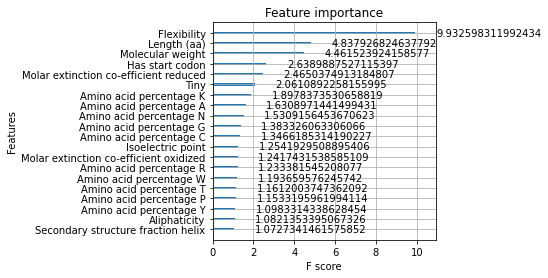

In [86]:
plot_importance(xgb_best, importance_type = 'gain', max_num_features = 20)
plt.show()

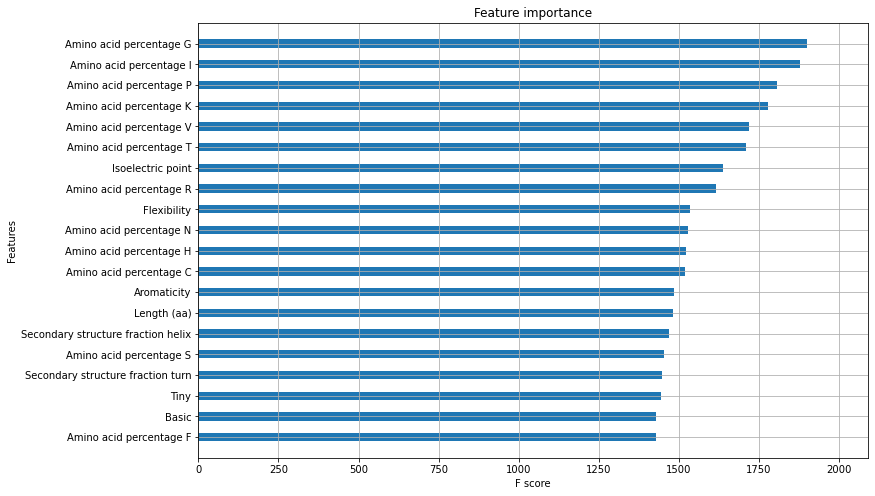

In [65]:
plot_importance(xgb_best, importance_type = 'weight', show_values = False, height=0.4, max_num_features = 20)
plt.show()

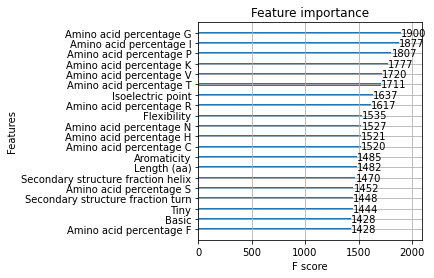

In [87]:
plot_importance(xgb_best, importance_type = 'weight', max_num_features = 20)
plt.show()